Path found: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Execution time: 0.000246 seconds


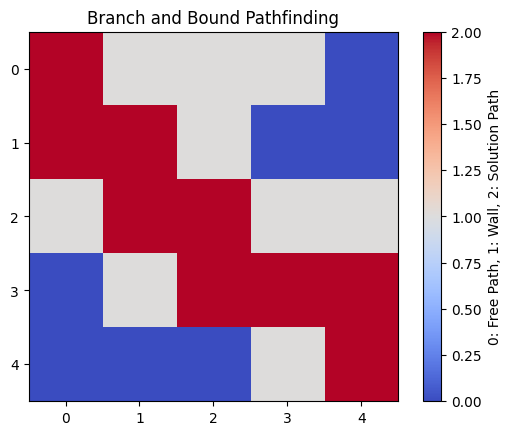

Average Execution Time: 0.000041 seconds


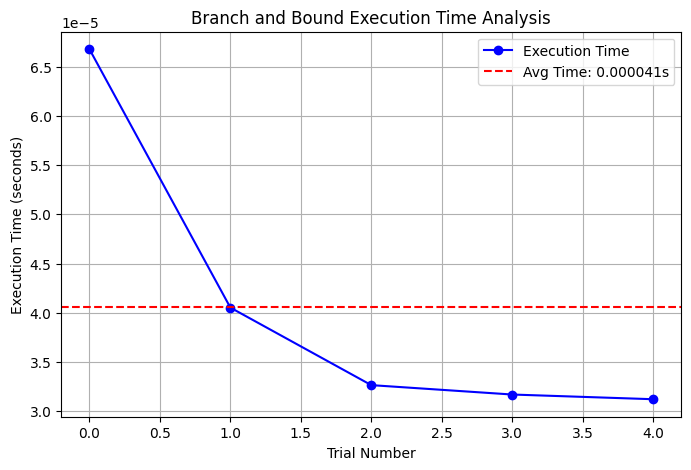

In [3]:
import numpy as np
import heapq
import time
import matplotlib.pyplot as plt

# Define a custom 5x5 maze (1 = wall, 0 = free path)
maze = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)  # Start position
goal = (4, 4)   # Goal position

class Node:
    """Node structure for Branch and Bound"""
    def __init__(self, position, cost, parent=None):
        self.position = position
        self.cost = cost
        self.parent = parent

    def __lt__(self, other):
        return self.cost < other.cost  # Priority queue comparison

def heuristic(a, b):
    """Manhattan distance heuristic"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def branch_and_bound(start, goal, maze):
    """Branch and Bound algorithm for finding the shortest path"""

    # Min-heap priority queue
    pq = []

    # Initial node with cost = heuristic
    start_node = Node(start, heuristic(start, goal))
    heapq.heappush(pq, start_node)

    # Visited set to store explored positions
    visited = set()

    while pq:
        node = heapq.heappop(pq)  # Get the node with the lowest cost

        # If goal is reached, reconstruct path
        if node.position == goal:
            path = []
            while node:
                path.append(node.position)
                node = node.parent
            return path[::-1]  # Reverse to get correct order

        if node.position in visited:
            continue
        visited.add(node.position)

        # Possible movements (Right, Down, Left, Up)
        for move in [(0,1), (1,0), (0,-1), (-1,0)]:
            new_pos = (node.position[0] + move[0], node.position[1] + move[1])

            # Check if move is within bounds and not a wall
            if 0 <= new_pos[0] < maze.shape[0] and 0 <= new_pos[1] < maze.shape[1] and maze[new_pos] == 0:
                new_cost = node.cost + 1  # g(n) increases by 1
                new_node = Node(new_pos, new_cost + heuristic(new_pos, goal), node)
                heapq.heappush(pq, new_node)

    return None  # No path found

# Solve the maze using Branch and Bound
start_time = time.time()
path = branch_and_bound(start, goal, maze)
end_time = time.time()

print("Path found:", path)
print(f"Execution time: {end_time - start_time:.6f} seconds")

# Visualization
maze_display = np.copy(maze)
for pos in path:
    maze_display[pos] = 2  # Mark path with '2'

plt.imshow(maze_display, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(maze.shape[1]))
plt.yticks(range(maze.shape[0]))
plt.title("Branch and Bound Pathfinding")
plt.colorbar(label="0: Free Path, 1: Wall, 2: Solution Path")
plt.show()

# Run B&B multiple times and measure execution time
num_trials = 5
execution_times = []

for _ in range(num_trials):
    start_time = time.time()
    path = branch_and_bound(start, goal, maze)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Compute average execution time
average_time = sum(execution_times) / num_trials
print(f"Average Execution Time: {average_time:.6f} seconds")

# Plot execution times
plt.figure(figsize=(8, 5))
plt.plot(range(num_trials), execution_times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.axhline(y=average_time, color='r', linestyle='--', label=f"Avg Time: {average_time:.6f}s")
plt.xlabel("Trial Number")
plt.ylabel("Execution Time (seconds)")
plt.title("Branch and Bound Execution Time Analysis")
plt.legend()
plt.grid()
plt.show()
